In [1]:
!pip install --upgrade pip --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

Keyring is skipped due to an exception: 'keyring.backends'
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [2]:
!pip install --upgrade pandas --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

Keyring is skipped due to an exception: 'keyring.backends'
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [3]:
!pip install --upgrade numpy --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

Keyring is skipped due to an exception: 'keyring.backends'
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [4]:
!pip install imbalanced-learn --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

Keyring is skipped due to an exception: 'keyring.backends'
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [5]:
!pip install xgboost --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

Keyring is skipped due to an exception: 'keyring.backends'
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [6]:
!pip install lightgbm --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

Keyring is skipped due to an exception: 'keyring.backends'
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [7]:
!pip install bayesian-optimization --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

Keyring is skipped due to an exception: 'keyring.backends'
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [8]:
!pip install category_encoders --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

Keyring is skipped due to an exception: 'keyring.backends'
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [9]:
# !pip install util --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

In [10]:
conda install shap

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [11]:
#importing librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import boto3
import io
import time
import gc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,\
roc_auc_score, make_scorer, plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix, average_precision_score,\
ConfusionMatrixDisplay

from sklearn.feature_selection import SelectFromModel
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

import tempfile
import boto3
import joblib

import shap

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [12]:
s3 = boto3.client('s3')

# Mention the bucket name where raw data is present
bucket='adl-core-sagemaker-studio'

# This is used to seperate different versions of data for whole lifecycle i.e., data pre-process, transformations, modeling and inferences.
# Mention the version whre data is stored in given S3 bucket
version = 'version-1'

preprocessed_data = f'external/artichauhan/Pre-Diabetes/Preprocessed-Data'

train_data = ['train_data_w_dummy.csv']

test_data = ['test_data_w_dummy.csv']

In [13]:
def load_data_from_s3(bucket,raw_data_path,raw_data_fnames):
    s3 = boto3.client('s3')
    dataset_nrows = []
    for i, fname in enumerate(raw_data_fnames):
        if i==0:
            print(f'Reading file: {fname}')
            key = f'{raw_data_path}/{fname}'
            obj = s3.get_object(Bucket=bucket, Key=key)
            data = pd.read_csv(io.BytesIO(obj['Body'].read()))
            dataset_nrows.append(data.shape[0])
            print(f'\tFile read successfully | Shape: {data.shape}')
        else:
            print(f'Reading file: {fname}')
            key = f'{raw_data_path}/{fname}'
            obj = s3.get_object(Bucket=bucket, Key=key)
            data2 = pd.read_csv(io.BytesIO(obj['Body'].read()))
            data = data.append(data2,ignore_index=True)
            dataset_nrows.append(data2.shape[0])
            print(f'\tFile read successfully | Shape: {data2.shape}')

    if sum(dataset_nrows) == data.shape[0]:
        print(f'Data from all files loaded successfully | Final Shape: {data.shape}')
        return data.copy()
    else:
        print('There is discrepency in numbers')
        print(f'\tTotal number of rows combined in all files: {sum(dataset_nrows)}')
        print(f'\tAfter combining all files total number of rows are: {data.shape[0]}')
        return None

#### Loading train set

In [14]:
# train_set = load_data_from_s3(bucket,preprocessed_data, train_data)

In [15]:
train_set = pd.read_csv('train_data_w_dummy.csv')

In [16]:
train_set.shape

(531655, 68)

In [17]:
train_set.head(2)

,Unnamed: 0,age,target,gender_Male,gender_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,preventive_visit_flag_yr_0_Yes,blood_glucose_test_flag_yr_0_Yes,hypertension_flag_yr_0_Yes,obesity_flag_yr_0_Yes,family_history_diabetes_flag_yr_0_Yes,physical_excercise_flag_yr_0_Yes,dietary_counselling_flag_yr_0_Yes,screening_diabetes_mellitus_flag_yr_0_Yes,cushing_syndrome_flag_yr_0_Yes,acromegaly_flag_yr_0_Yes,nocturia_flag_yr_0_Yes,polydipsia_flag_yr_0_Yes,ovarian_disorder_flag_yr_0_Yes,heart_disorder_flag_yr_0_Yes,preventive_visit_flag_yr_1_Yes,blood_glucose_test_flag_yr_1_Yes,hypertension_flag_yr_1_Yes,obesity_flag_yr_1_Yes,family_history_diabetes_flag_yr_1_Yes,physical_excercise_flag_yr_1_Yes,dietary_counselling_flag_yr_1_Yes,screening_diabetes_mellitus_flag_yr_1_Yes,cushing_syndrome_flag_yr_1_Yes,acromegaly_flag_yr_1_Yes,nocturia_flag_yr_1_Yes,polydipsia_flag_yr_1_Yes,ovarian_disorder_flag_yr_1_Yes,heart_disorder_flag_yr_1_Yes,preventive_visit_flag_yr_Yes,blood_glucose_test_flag_yr_Yes,hypertension_flag_yr_Yes,obesity_flag_yr_Yes,family_history_diabetes_flag_yr_Yes,physical_excercise_flag_yr_Yes,dietary_counselling_flag_yr_Yes,screening_diabetes_mellitus_flag_yr_Yes,cushing_syndrome_flag_yr_Yes,acromegaly_flag_yr_Yes,nocturia_flag_yr_Yes,polydipsia_flag_yr_Yes,ovarian_disorder_flag_yr_Yes,heart_disorder_flag_yr_Yes,specialist_ind_Yes,primary_care_ind_Yes,physician_ind_Yes,unknown_ind_Yes,durable_medical_ind_Yes,lab_visit_ind_Yes,specialist_ind_y0_Yes,primary_care_ind_y0_Yes,physician_ind_y0_Yes,unknown_ind_y0_Yes,durable_medical_ind_y0_Yes,lab_visit_ind_y0_Yes,specialist_ind_y1_Yes,primary_care_ind_y1_Yes,physician_ind_y18_Yes,unknown_ind_y1_Yes,durable_medical_ind_y1_Yes,lab_visit_ind_y1_Yes
0,0,44.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,1
1,1,51.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# train_set.columns

In [19]:
train_set.drop(['Unnamed: 0'],inplace=True,axis=1)

In [20]:
# distribution of target variable
train_set['target'].value_counts()

0    503390
1     28265
Name: target, dtype: int64

In [21]:
# distribution of target variable
train_set['target'].value_counts(normalize=True)

0    0.946836
1    0.053164
Name: target, dtype: float64

In [22]:
train_X = train_set.drop(columns=['target'],axis=1)
train_y = train_set['target']

In [23]:
print(train_X.shape)
print(train_y.shape)

(531655, 66)
(531655,)


#### Loading test set

In [24]:
# test_set = load_data_from_s3(bucket,preprocessed_data, test_data)

In [25]:
test_set = pd.read_csv('test_data_w_dummy.csv')

In [26]:
test_set.head(2)

,Unnamed: 0,age,target,gender_Male,gender_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,preventive_visit_flag_yr_0_Yes,blood_glucose_test_flag_yr_0_Yes,hypertension_flag_yr_0_Yes,obesity_flag_yr_0_Yes,family_history_diabetes_flag_yr_0_Yes,physical_excercise_flag_yr_0_Yes,dietary_counselling_flag_yr_0_Yes,screening_diabetes_mellitus_flag_yr_0_Yes,cushing_syndrome_flag_yr_0_Yes,acromegaly_flag_yr_0_Yes,nocturia_flag_yr_0_Yes,polydipsia_flag_yr_0_Yes,ovarian_disorder_flag_yr_0_Yes,heart_disorder_flag_yr_0_Yes,preventive_visit_flag_yr_1_Yes,blood_glucose_test_flag_yr_1_Yes,hypertension_flag_yr_1_Yes,obesity_flag_yr_1_Yes,family_history_diabetes_flag_yr_1_Yes,physical_excercise_flag_yr_1_Yes,dietary_counselling_flag_yr_1_Yes,screening_diabetes_mellitus_flag_yr_1_Yes,cushing_syndrome_flag_yr_1_Yes,acromegaly_flag_yr_1_Yes,nocturia_flag_yr_1_Yes,polydipsia_flag_yr_1_Yes,ovarian_disorder_flag_yr_1_Yes,heart_disorder_flag_yr_1_Yes,preventive_visit_flag_yr_Yes,blood_glucose_test_flag_yr_Yes,hypertension_flag_yr_Yes,obesity_flag_yr_Yes,family_history_diabetes_flag_yr_Yes,physical_excercise_flag_yr_Yes,dietary_counselling_flag_yr_Yes,screening_diabetes_mellitus_flag_yr_Yes,cushing_syndrome_flag_yr_Yes,acromegaly_flag_yr_Yes,nocturia_flag_yr_Yes,polydipsia_flag_yr_Yes,ovarian_disorder_flag_yr_Yes,heart_disorder_flag_yr_Yes,specialist_ind_Yes,primary_care_ind_Yes,physician_ind_Yes,unknown_ind_Yes,durable_medical_ind_Yes,lab_visit_ind_Yes,specialist_ind_y0_Yes,primary_care_ind_y0_Yes,physician_ind_y0_Yes,unknown_ind_y0_Yes,durable_medical_ind_y0_Yes,lab_visit_ind_y0_Yes,specialist_ind_y1_Yes,primary_care_ind_y1_Yes,physician_ind_y18_Yes,unknown_ind_y1_Yes,durable_medical_ind_y1_Yes,lab_visit_ind_y1_Yes
0,0,68.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1
1,1,40.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
test_set.drop(['Unnamed: 0'],inplace=True,axis=1)

In [28]:
test_set.shape

(132914, 67)

In [29]:
# distribution of target variable
test_set['target'].value_counts(normalize=True)

0    0.946838
1    0.053162
Name: target, dtype: float64

In [30]:
test_X = test_set.drop(columns=['target'],axis=1)
test_y = test_set['target']

In [31]:
print(test_X.shape)
print(test_y.shape)

(132914, 66)
(132914,)


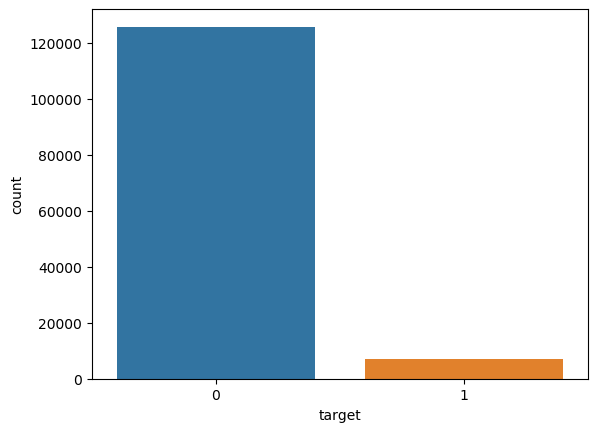

In [32]:
#checking distribution of target feature
sns.countplot(data=test_set,x='target')
plt.show()

### LogisticRegression

In [33]:
# %%time
# lr = LogisticRegression()

# lr = lr.fit(train_X, train_y)

In [34]:
# pred_lr  = lr.predict(test_X)

### RandomForestClassifier

In [35]:
# %%time
# rf = RandomForestClassifier()

# rf = rf.fit(train_X, train_y)

In [36]:
# pred_rf  = rf.predict(test_X)

### SVC

In [37]:
# svc = SVC()

# svc = svc.fit(train_X, train_y)

In [38]:
# pred_svc  = svc.predict(test_X)

### DecisionTreeClassifier

In [39]:
# %%time
# dt = DecisionTreeClassifier(random_state=1)

# dt = dt.fit(train_X, train_y)

In [40]:
# pred_dt  = dt.predict(test_X)

### GaussianNB

In [43]:
%%time
dt = GaussianNB()

dt = dt.fit(train_X, train_y)

CPU times: user 468 ms, sys: 205 ms, total: 673 ms
Wall time: 670 ms


In [44]:
pred_dt  = dt.predict(test_X)

### XGBClassifier

In [45]:
# %%time
# xgb = XGBClassifier(random_state=1)

# xgb = xgb.fit(train_X.values, train_y.values)

In [46]:
# pred_xgb  = xgb.predict(test_X)

### LGBMClassifier

In [47]:
# %%time
# lgbm = LGBMClassifier()

# lgbm = lgbm.fit(train_X.values, train_y.values)

In [48]:
# pred_lgbm  = lgbm.predict(test_X)

### KNeighborsClassifier

In [49]:
# %%time
# knn = KNeighborsClassifier()
# knn = knn.fit(train_X, train_y)

In [50]:
# pred_knn = knn.predict(test_X)

### MLPClassifier

In [51]:
# %%time
# mlpc = MLPClassifier()
# mlpc.fit(train_X, train_y)

In [52]:
# pred_mlpc = mlpc.predict(test_X)

## Classification Reports of above models on Test Set

In [53]:
# print("Logistic Regression:\n", classification_report(test_y, pred_lr))
# print("ROC AUC score for data: ", roc_auc_score(test_y, lr.predict_proba(test_X)[:,1], average='weighted'))

In [54]:
# print("RandonForestClassifier:\n", classification_report(test_y, pred_rf))
# print("ROC AUC score for data: ", roc_auc_score(test_y, rf.predict_proba(test_X)[:,1], average='weighted'))

In [55]:
# print("DecisionTreeClassifier:\n", classification_report(test_y, pred_dt))
# print("ROC AUC score for data: ", roc_auc_score(test_y, dt.predict_proba(test_X)[:,1], average='weighted'))

In [56]:
print("GaussianNB:\n", classification_report(test_y, pred_dt))
print("ROC AUC score for data: ", roc_auc_score(test_y, dt.predict_proba(test_X)[:,1], average='weighted'))

GaussianNB:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93    125848
           1       0.15      0.27      0.19      7066

    accuracy                           0.88    132914
   macro avg       0.55      0.59      0.56    132914
weighted avg       0.91      0.88      0.89    132914

ROC AUC score for data:  0.7493480756409823


In [57]:
# print("XGBClassifier:\n", classification_report(test_y, pred_xgb))
# print("ROC AUC score for data: ", roc_auc_score(test_y, xgb.predict_proba(test_X)[:,1], average='weighted'))

In [58]:
# print("ROC AUC score for data: ", roc_auc_score(test_y, xgb.predict_proba(test_X)[:,1], average='macro'))

In [59]:
# print("LGBMClassifier:\n", classification_report(test_y, pred_lgbm))
# print("ROC AUC score for data: ", roc_auc_score(test_y, lgbm.predict_proba(test_X)[:,1], average='weighted'))

In [60]:
# print("KNeighborsClassifier:\n", classification_report(test_y, pred_knn))
# print("ROC AUC score for data: ", roc_auc_score(test_y, knn.predict_proba(test_X)[:,1], average='weighted'))

In [61]:
# print("MLPClassifier:\n", classification_report(test_y, pred_mlpc))
# print("ROC AUC score for data: ", roc_auc_score(test_y, mlpc.predict_proba(test_X)[:,1], average='weighted'))

In [62]:
def print_dataframe(df):
    
    """
    Print or display the entire dataframe
    
    Parameters
    ----------
    df: Dataframe
   
    Returns
    -------
    df: None
    
    """
    
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
        
    display(df)
    
    return None

In [63]:
# print_dataframe(test_set)

In [64]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [93]:
# def load_and_test_models(df1):
    
#     # retrieve numpy array
    
#     #data = df.values
#     # split into input and output elements
#     X = df1.drop(['target'],axis=1)
#     y = df1["target"]



#    # label encode the target variable to have the classes 0, 1, 2, etc.
#     # This is already done for all cat features on in earlier statements.
#     #y = LabelEncoder().fit_transform(y)
    
#     #print('\nType of target _________ {}'.format(type_of_target(y)))
    




#     models = [RandomForestClassifier(n_estimators=1000),
#               LogisticRegression(), XGBClassifier(), DecisionTreeClassifier()]
  
#     # define evaluation procedure
#     CV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#     #CV = 5



#    #index=range(CV * len(models))
#     cv_df = pd.DataFrame()
   
#     entries = []
    
#     for model in models:
        
#         model_name = model.__class__.__name__
        
#         # evaluate model
#         accuracies = cross_val_score(model, X.values, y.values, scoring='accuracy', cv=CV, n_jobs=-1)
            
#         for fold_idx, accuracy in enumerate(accuracies):
#             entries.append((model_name, fold_idx, accuracy))



#     cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
#     cv_df.accuracy*=100
#     # summarize performance
#     cv_df_mean_accuracy = pd.DataFrame(cv_df.groupby(['model_name']).agg({'accuracy': ['mean', 'std']}).reset_index())
    
#     cv_df_mean_accuracy.columns = ['_'.join(col) for col in cv_df_mean_accuracy.columns]
    
#     print_dataframe(cv_df_mean_accuracy)
#     print('\n')
    
#     # Plot model performance
    
#     plt.figure(figsize=(10,6))



#     sns.boxplot(x='model_name', y='accuracy', data=cv_df)



#     sns.stripplot(x='model_name', y='accuracy', data=cv_df,
#                   size=8, jitter=True, edgecolor="gray", linewidth=2)
#   #  plt.title("Accuracy ranging from 80-100%")
#     #plt.ylim(80, 100)
#     plt.show()

In [66]:
# # X = test_set.drop(['target'],axis=1)
# # y = test_set["target"]
# # define model
# model = DecisionTreeClassifier()
# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, test_X.values, test_y.values, scoring='accuracy', cv=cv, n_jobs=-1)
# # summarize performance
# print('Accuracy: %.5f' % np.mean(scores))
# print('STD: %.5f' % np.std(scores))

In [67]:
# load_and_test_models(test_set)

In [68]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score, auc,accuracy_score, cohen_kappa_score, plot_confusion_matrix, precision_recall_curve
#balanced_accuracy_scor
from sklearn.metrics import roc_curve

In [69]:
def expect_f1(y_prob, thres):
    idxs = np.where(y_prob >= thres)[0]
    tp = y_prob[idxs].sum()
    fp = len(idxs) - tp
    idxs = np.where(y_prob < thres)[0]
    fn = y_prob[idxs].sum()
    return 2*tp / (2*tp + fp + fn)

def optimal_threshold(y_prob):
    y_prob = np.sort(y_prob)[::-1]
    f1s = [expect_f1(y_prob, p) for p in y_prob]
    thres = y_prob[np.argmax(f1s)]
    return thres, f1s

In [70]:
# imporiving threshold for f1
thresholds = np.arange(0, 1, 0.001)
yhat = dt.predict_proba(test_X)
scores = [f1_score(test_y, (yhat[:, 1] >= t).astype('int'), average='macro') for t in thresholds]
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.134, F-Score=0.56502


In [71]:
# thres, f1s = optimal_threshold(yhat)
# print(f"Predicted Optimal Threshold is {thres} with F1 score {expect_f1(test_y, thres)}")

In [72]:
metrics_keeper = pd.DataFrame()
classes = 2
class_names = ["No","Yes"]

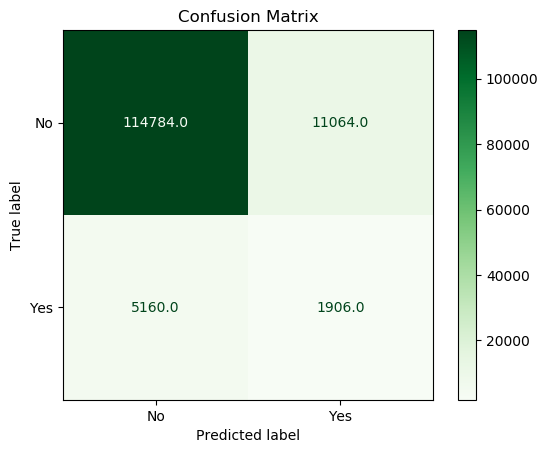

In [73]:
# model_name = "xgb"
# xgb = XGBClassifier()
# xgb = xgb.fit(train_X.values, train_y.values)
# pred  = xgb.predict(test_X)
# accuracy = accuracy_score(test_y, pred)
# kappa = cohen_kappa_score(test_y, pred)
# roc = roc_auc_score(test_y, pred)
# precision, recall, _ = precision_recall_curve(test_y, pred)
# aucpr = auc(recall, precision)
clr = [i for i in classification_report(test_y, pred_dt).split(" ") if i !="" and "\n" not in i][:-9]
plot_confusion_matrix(dt, test_X, test_y, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.title("Confusion Matrix")
plt.show()

In [88]:
# FPR = FP/FP+TN 
FPR = 11064/(11064+114784)
round(FPR,2)

0.09

In [89]:
# TPR = TP/TP+FN
TPR = 1906/(1906+5160)
round(TPR,2)

0.27

In [76]:
#Get the confusion matrix
cf_matrix = confusion_matrix(test_y, pred_dt)
print(cf_matrix)

[[114784  11064]
 [  5160   1906]]


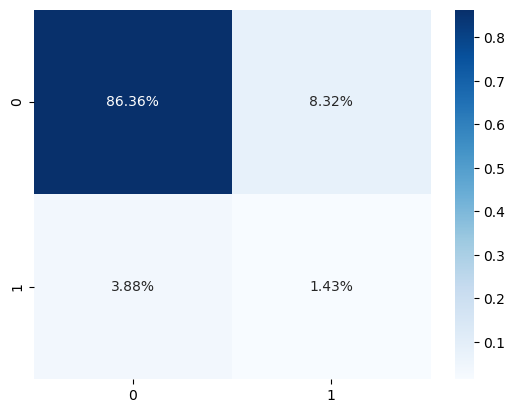

In [77]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [78]:
# plot_confusion_matrix(estimator=xgb, X=test_X, y_true=test_y, cmap='Blues',values_format='.0f')
# plt.title('Confusion Matrix', size=15)
# # plt.savefig('Confusion Matrix.png')
# plt.show()

In [79]:
# tmp = np.sort(yhat)
# f1s = np.array(f1s)

# fig = plt.figure(figsize=(12, 6))

# ax = fig.add_subplot(1, 2, 1)
# ax.plot(tmp, f1s[::-1])
# ax.vlines(thres, 0, 1, linestyles="--")
# ax.set_xlabel('Threshold')
# ax.set_ylabel("F1 score")
# ax.set_ylim([0, 1]);

# ax = fig.add_subplot(1, 2, 2)
# ax.plot(tmp[::-1], label="Predicted probability")
# ax.plot(f1s, label='F1')
# ax.plot(f1s/2, label='F1/2')
# ax.set_xlabel('Index')
# ax.legend()
# ax.set_ylim([0, 1]);

In [80]:
print('Metrics Score on best Random Forest model on Testing Set')
print('Macro Recall=%.2f' %(recall_score(test_y, pred_dt, average='macro')))
print('Macro Precision=%.2f' %(precision_score(test_y, pred_dt, average='macro')))
print('Macro F1 Score=%.2f' %(f1_score(test_y, pred_dt, average='macro')))
print('Macro ROC AUC=%.2f' %(roc_auc_score(test_y, yhat[:,1], average='macro')))
print('Macro AUPRC=%.2f' %(average_precision_score(test_y, yhat[:,1], average='macro')))
print('Macro Simple Accuracy=%.2f' %(accuracy_score(test_y, pred_dt)))

Metrics Score on best Random Forest model on Testing Set
Macro Recall=0.59
Macro Precision=0.55
Macro F1 Score=0.56
Macro ROC AUC=0.75
Macro AUPRC=0.12
Macro Simple Accuracy=0.88


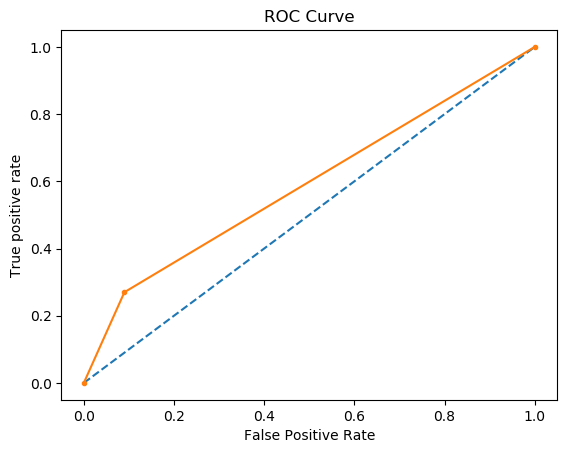

In [90]:
# from sklearn.metrics import roc_auc_score, roc_curve, calculated manually to adjust the plot
# print(roc_curve(y_val,pred))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot([0,0.09,1], [0,0.27,1], marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive rate")
plt.show()

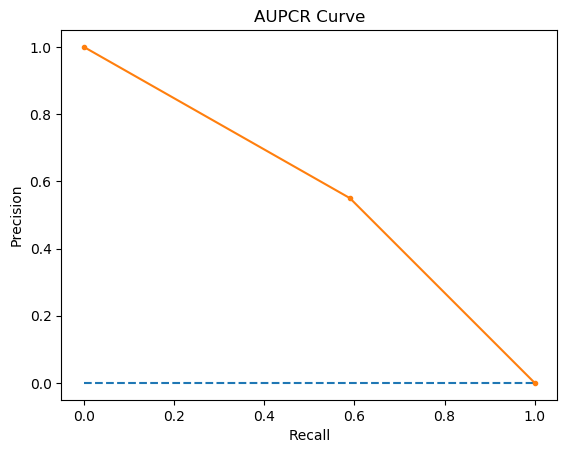

In [94]:
# plotting macro recall and precision
plt.plot([0, 1], [0, 0], linestyle='--', label='No Skill')
plt.plot([1,.59,0], [0,.55,1], marker='.')
plt.title("AUPCR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [83]:
# # adding utils folder
# import sys
# sys.path.insert(0,'../..')
# from util import general_functions as gf
# import util
# from importlib import reload

## Features Importance from XGBoost Model with default parameters

In [ ]:
# pd.Series(dt.feature_importances_, index=train_X.columns).sort_values(ascending=True)[-20:].plot(kind='barh', figsize=(6,6))

In [99]:
# from sklearn.inspection import permutation_importance
# imps = permutation_importance(dt, test_X, test_y)
# print(imps.importances_mean)

### SMOTE

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
smt = SMOTE(random_state=42)
train_X_smt, train_y_smt = smt.fit_resample(train_X, train_y)

In [102]:
print(train_X.shape, train_y.shape, train_y.value_counts(), train_y.value_counts(normalize=True), sep='\n')

(531655, 66)
(531655,)
0    503390
1     28265
Name: target, dtype: int64
0    0.946836
1    0.053164
Name: target, dtype: float64


In [103]:
print(train_X_smt.shape, train_y_smt.shape, train_y_smt.value_counts(), train_y_smt.value_counts(normalize=True), sep='\n')

(1006780, 66)
(1006780,)
0    503390
1    503390
Name: target, dtype: int64
0    0.5
1    0.5
Name: target, dtype: float64


### Gaussian NB

In [104]:
%%time
dt_smt = dt.fit(train_X_smt.values, train_y_smt.values)

CPU times: user 944 ms, sys: 560 ms, total: 1.5 s
Wall time: 1.5 s


In [105]:
pred_dt_smt  = dt_smt.predict(test_X.values)

In [107]:
print("XGBClassifier:\n", classification_report(train_y_smt, dt_smt.predict(train_X_smt)))
print("ROC AUC score for data: ", roc_auc_score(train_y_smt, dt_smt.predict_proba(train_X_smt)[:,1], average='weighted'))

XGBClassifier:
               precision    recall  f1-score   support

           0       0.77      0.09      0.16    503390
           1       0.52      0.97      0.67    503390

    accuracy                           0.53   1006780
   macro avg       0.64      0.53      0.42   1006780
weighted avg       0.64      0.53      0.42   1006780

ROC AUC score for data:  0.7559279586302009


In [109]:
# print('Weighted metrics Score on XGBoost model on Training Set')
# print('Recall:'.ljust(20, " "),round(recall_score(train_y_smt, dt_smt.predict(train_y_smt), average='weighted'),3))
# print('Precision: '.ljust(20, " "),round(precision_score(train_y_smt, dt_smt.predict(train_X_smt), average='weighted'),2))
# print('F1: '.ljust(20, " "),round(f1_score(train_y_smt, dt_smt.predict(train_X_smt), average='weighted'),2))
# print('Simple Accuracy: '.ljust(20, " "),round(accuracy_score(train_y_smt, dt_smt.predict(train_X_smt)),2))
# print('ROC AUC: '.ljust(20, " "),round(roc_auc_score(train_y_smt, dt_smt.predict_proba(train_X_smt)[:,1], average='weighted'),2))
# print('AUPRC: '.ljust(20, " "),round(average_precision_score(train_y_smt, dt_smt.predict_proba(train_X_smt)[:,1], average='weighted'),2))

In [110]:
print("XGBClassifier:\n", classification_report(test_y, pred_dt_smt))
print("ROC AUC score for data: ", roc_auc_score(test_y, dt_smt.predict_proba(test_X)[:,1], average='weighted'))

XGBClassifier:
               precision    recall  f1-score   support

           0       0.94      0.09      0.16    125848
           1       0.05      0.90      0.10      7066

    accuracy                           0.13    132914
   macro avg       0.50      0.49      0.13    132914
weighted avg       0.89      0.13      0.16    132914

ROC AUC score for data:  0.70282870072547


In [111]:
print('Weighted metrics Score on XGBoost model on Test Set')
print('Recall:'.ljust(20, " "),round(recall_score(test_y, pred_dt_smt, average='weighted'),2))
print('Precision: '.ljust(20, " "),round(precision_score(test_y, pred_dt_smt, average='weighted'),2))
print('F1: '.ljust(20, " "),round(f1_score(test_y, pred_dt_smt, average='weighted'),2))
print('Simple Accuracy: '.ljust(20, " "),round(accuracy_score(test_y, pred_dt_smt),2))
print('ROC AUC: '.ljust(20, " "),round(roc_auc_score(test_y, dt_smt.predict_proba(test_X)[:,1], average='weighted'),2))
print('AUPRC: '.ljust(20, " "),round(average_precision_score(test_y, dt_smt.predict_proba(test_X)[:,1], average='weighted'),2))

Weighted metrics Score on XGBoost model on Test Set
Recall:              0.13
Precision:           0.89
F1:                  0.16
Simple Accuracy:     0.13
ROC AUC:             0.7
AUPRC:               0.13


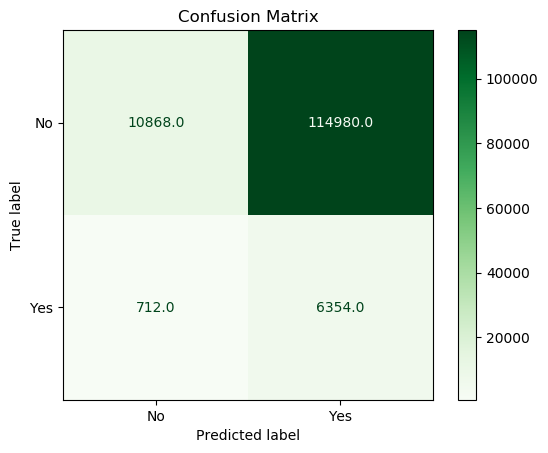

In [112]:
# model_name = "xgb"
# xgb = XGBClassifier()
# xgb = xgb.fit(train_X.values, train_y.values)
# pred  = xgb.predict(test_X)
accuracy = accuracy_score(test_y, pred_dt_smt)
kappa = cohen_kappa_score(test_y, pred_dt_smt)
roc = roc_auc_score(test_y, pred_dt_smt)
precision, recall, _ = precision_recall_curve(test_y, pred_dt_smt)
aucpr = auc(recall, precision)
clr = [i for i in classification_report(test_y, pred_dt_smt).split(" ") if i !="" and "\n" not in i][:-9]
plot_confusion_matrix(dt_smt, test_X, test_y, display_labels=class_names, cmap=plt.cm.Greens, values_format = '.1f')  
plt.title("Confusion Matrix")
plt.show()

In [117]:
# FPR = FP/FP+TN 
FPR = 114980/(114980+10868)
round(FPR,2)

0.91

In [118]:
# TPR = TP/TP+FN
TPR = 6354/(6354+712)
round(TPR,2)

0.9

In [119]:
#Get the confusion matrix
cf_matrix = confusion_matrix(test_y, pred_dt_smt)
print(cf_matrix)

[[ 10868 114980]
 [   712   6354]]


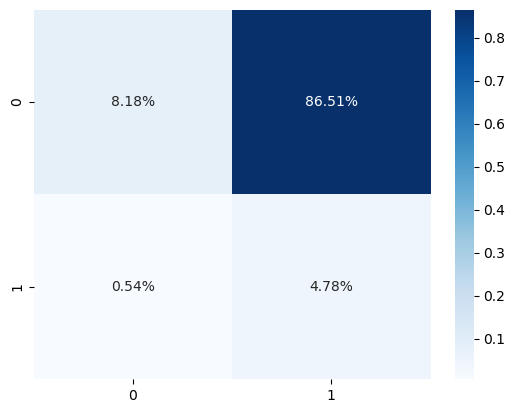

In [120]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

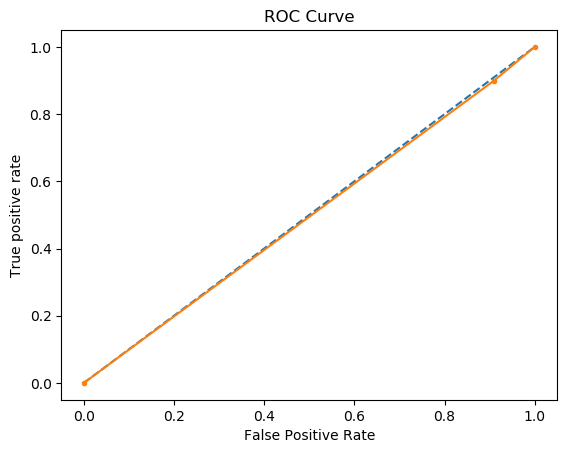

In [121]:
# from sklearn.metrics import roc_auc_score, roc_curve, calculated manually to adjust the plot
# print(roc_curve(y_val,pred))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot([0,0.91,1], [0,0.90,1], marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive rate")
plt.show()

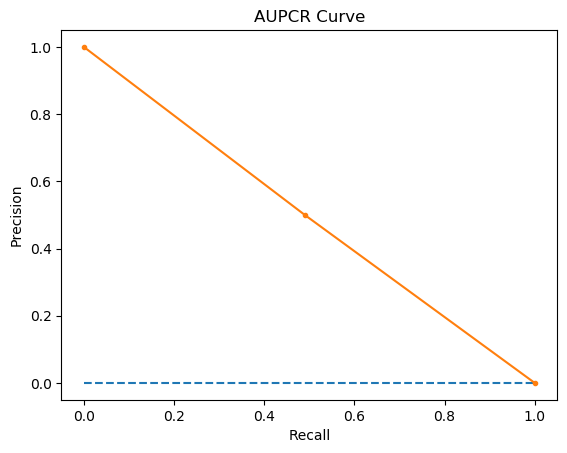

In [122]:
# plotting macro recall and precision
plt.plot([0, 1], [0, 0], linestyle='--', label='No Skill')
plt.plot([1,.49,0], [0,.50,1], marker='.')
plt.title("AUPCR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
# pd.Series(xgb_dt.feature_importances_, index=train_X_smt.columns).sort_values(ascending=True)[-20:].plot(kind='barh', figsize=(6,6))

## Using SHAP values to interpret the model

In [123]:
# Fits the explainer
explainer = shap.Explainer(dt.predict, test_X[:2000])
# Calculates the SHAP values - It takes some time
shap_values = explainer(test_X[:2000])

Permutation explainer: 2001it [02:01, 16.53it/s]                          


In [124]:
pred_prob = dt.predict(test_X[:2000])

In [125]:
pred_prob.mean()

0.927

In [126]:
shap_values.base_values

array([0.85, 0.85, 0.85, ..., 0.85, 0.85, 0.85])

In [127]:
shap.initjs()
shap.plots.force(shap_values.base_values[5],shap_values.values[5], feature_names=test_X.columns)

In [128]:
shap.plots.force(shap_values.base_values[2],shap_values.values[2], feature_names=test_X.columns)

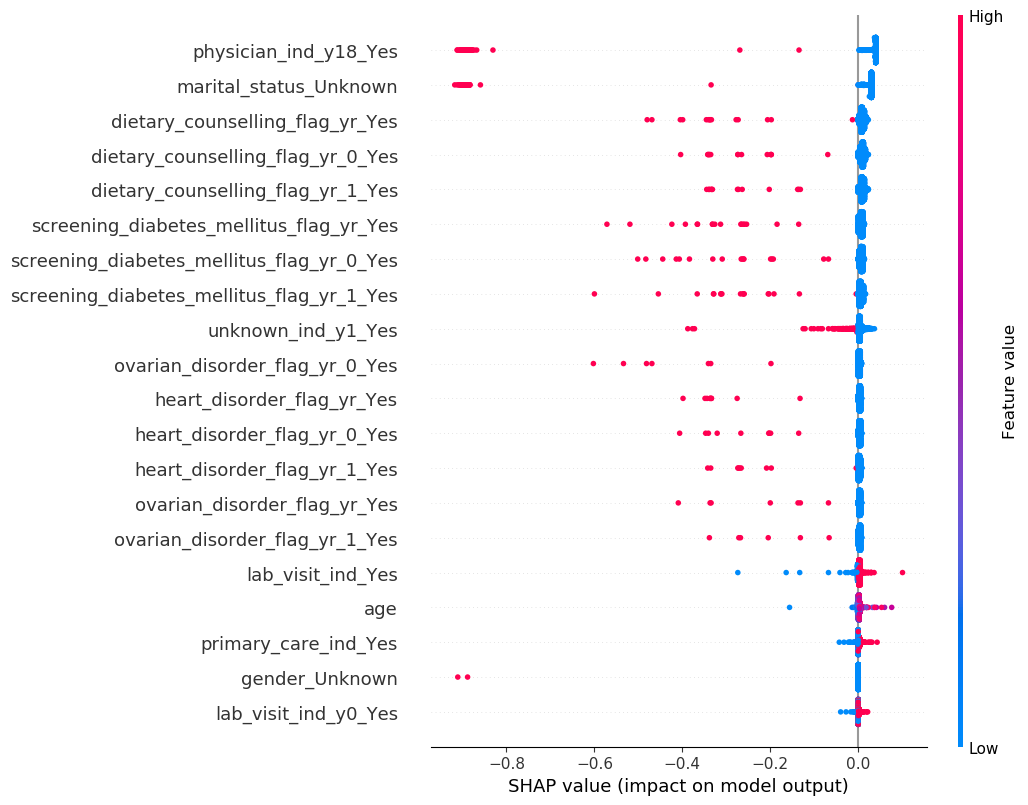

In [129]:
f = plt.figure()
shap.summary_plot(shap_values)
# f.savefig('shap.png',bbox_inches='tight', dpi=600)

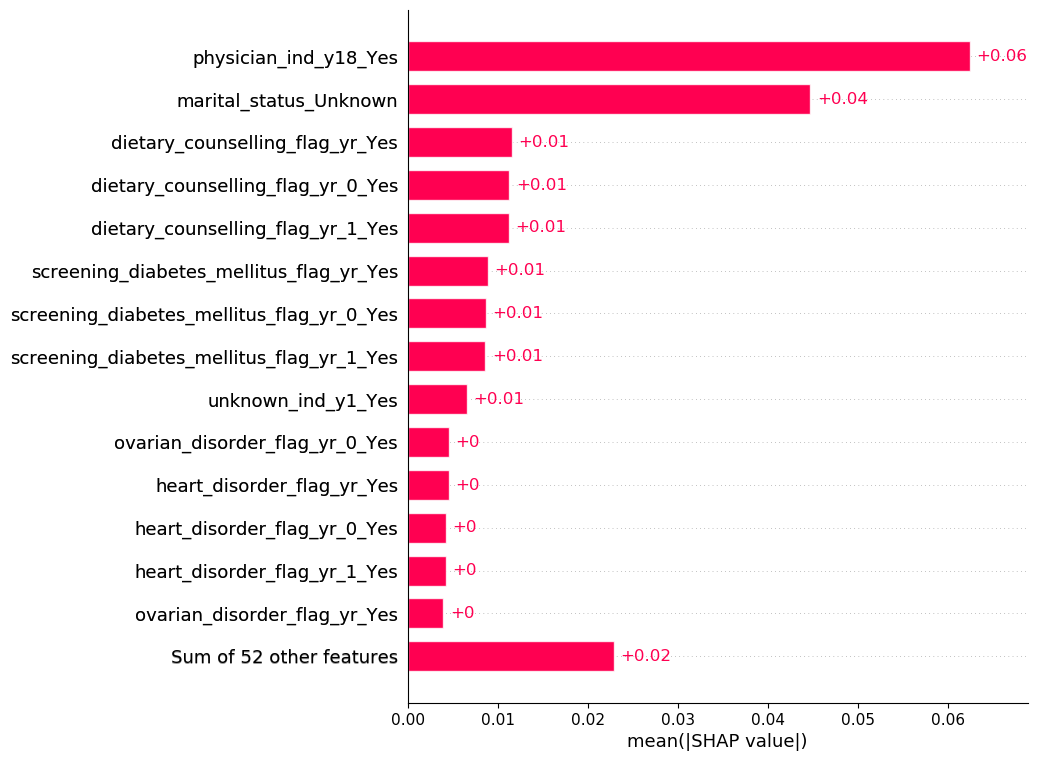

In [130]:
f = plt.figure()
shap.plots.bar(shap_values, max_display=15)
# f.savefig('shap.png',bbox_inches='tight', dpi=600)

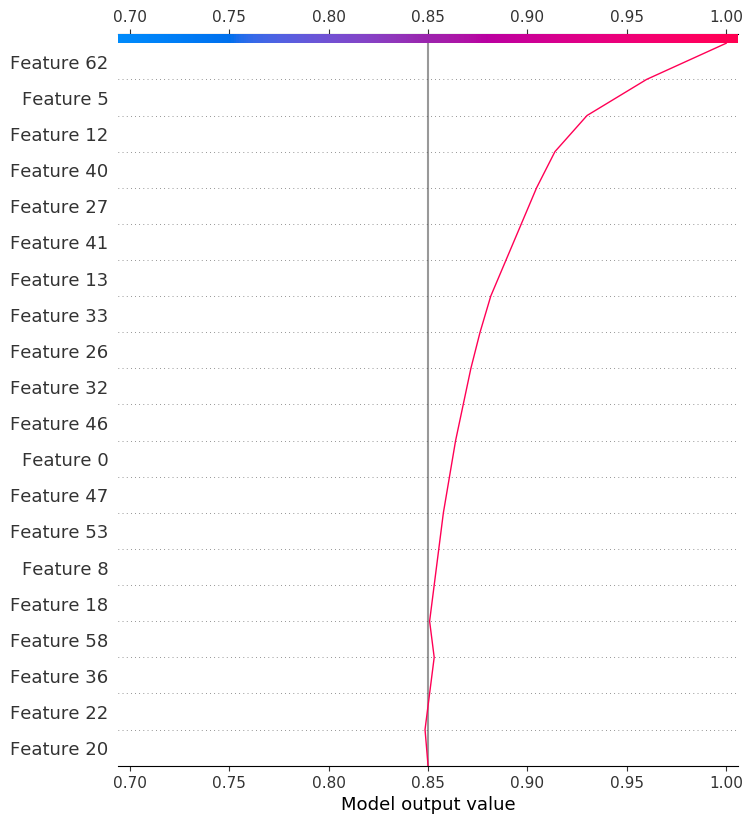

In [131]:
shap.decision_plot(shap_values.base_values[0], shap_values.values[0])

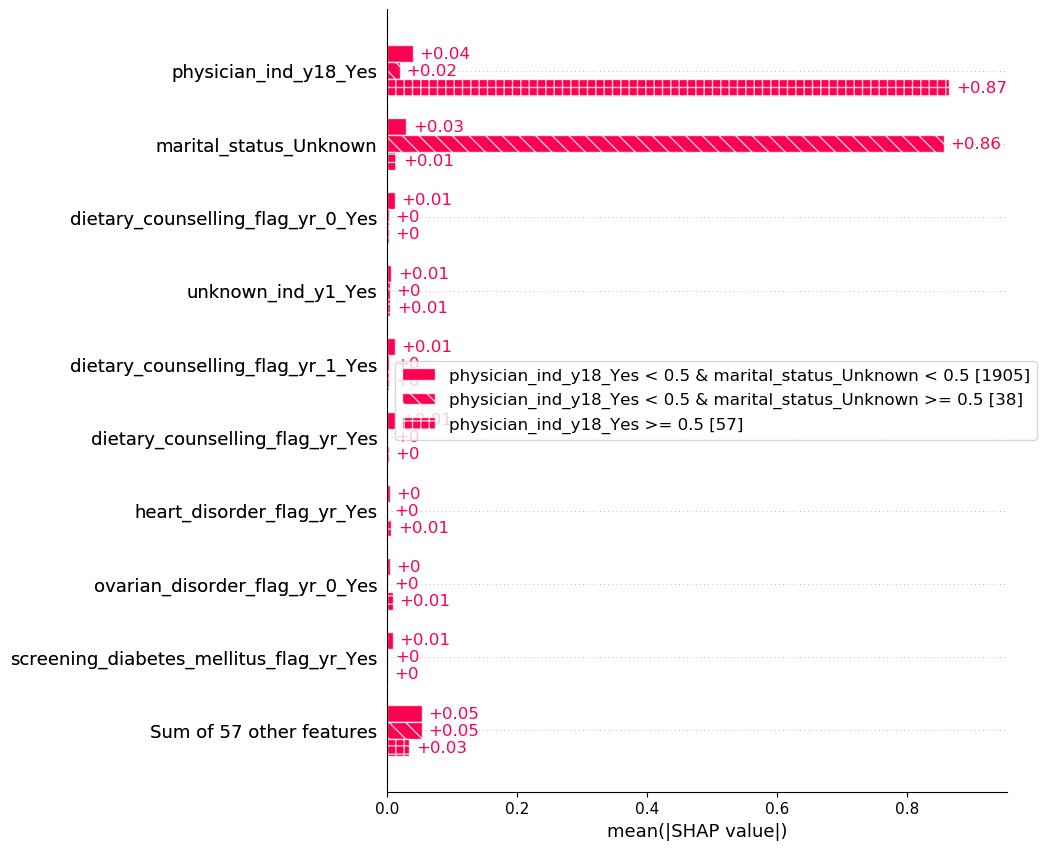

In [132]:
shap.plots.bar(shap_values.cohorts(3).abs.mean(0))

In [133]:
shap_df = pd.DataFrame(shap_values.values, columns=train_X.columns)
shap_df.shape

(2000, 66)

In [134]:
shap_df.head()

,age,gender_Male,gender_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,preventive_visit_flag_yr_0_Yes,blood_glucose_test_flag_yr_0_Yes,hypertension_flag_yr_0_Yes,obesity_flag_yr_0_Yes,family_history_diabetes_flag_yr_0_Yes,physical_excercise_flag_yr_0_Yes,dietary_counselling_flag_yr_0_Yes,screening_diabetes_mellitus_flag_yr_0_Yes,cushing_syndrome_flag_yr_0_Yes,acromegaly_flag_yr_0_Yes,nocturia_flag_yr_0_Yes,polydipsia_flag_yr_0_Yes,ovarian_disorder_flag_yr_0_Yes,heart_disorder_flag_yr_0_Yes,preventive_visit_flag_yr_1_Yes,blood_glucose_test_flag_yr_1_Yes,hypertension_flag_yr_1_Yes,obesity_flag_yr_1_Yes,family_history_diabetes_flag_yr_1_Yes,physical_excercise_flag_yr_1_Yes,dietary_counselling_flag_yr_1_Yes,screening_diabetes_mellitus_flag_yr_1_Yes,cushing_syndrome_flag_yr_1_Yes,acromegaly_flag_yr_1_Yes,nocturia_flag_yr_1_Yes,polydipsia_flag_yr_1_Yes,ovarian_disorder_flag_yr_1_Yes,heart_disorder_flag_yr_1_Yes,preventive_visit_flag_yr_Yes,blood_glucose_test_flag_yr_Yes,hypertension_flag_yr_Yes,obesity_flag_yr_Yes,family_history_diabetes_flag_yr_Yes,physical_excercise_flag_yr_Yes,dietary_counselling_flag_yr_Yes,screening_diabetes_mellitus_flag_yr_Yes,cushing_syndrome_flag_yr_Yes,acromegaly_flag_yr_Yes,nocturia_flag_yr_Yes,polydipsia_flag_yr_Yes,ovarian_disorder_flag_yr_Yes,heart_disorder_flag_yr_Yes,specialist_ind_Yes,primary_care_ind_Yes,physician_ind_Yes,unknown_ind_Yes,durable_medical_ind_Yes,lab_visit_ind_Yes,specialist_ind_y0_Yes,primary_care_ind_y0_Yes,physician_ind_y0_Yes,unknown_ind_y0_Yes,durable_medical_ind_y0_Yes,lab_visit_ind_y0_Yes,specialist_ind_y1_Yes,primary_care_ind_y1_Yes,physician_ind_y18_Yes,unknown_ind_y1_Yes,durable_medical_ind_y1_Yes,lab_visit_ind_y1_Yes
0,0.003077,0.0,0.0,0.0,0.0,0.03,0.000000,0.000000,0.002308,0.0,0.0,0.0,0.016154,0.007692,0.0,0.0,0.0,0.0,0.002308,0.001538,-0.001538,0.000769,0.002308,0.0,0.0,0.0,0.004615,0.007692,0.0,0.0,0.0,0.0,0.003846,0.005385,-0.000769,0.000769,0.002308,0.0,0.0,0.0,0.009231,0.007692,0.0,0.0,0.0,0.0,0.003846,0.003077,-0.000769,-0.000769,-0.001538,0.0,0.0,0.002308,0.000000,0.000000,0.0,0.000000,-0.002308,0.000000,0.0,0.000000,0.04,0.000769,0.0,0.0
1,0.001538,0.0,0.0,0.0,0.0,0.03,0.000000,0.000000,-0.000769,0.0,0.0,0.0,0.011538,0.004615,0.0,0.0,0.0,0.0,0.002308,0.000769,-0.000769,0.000000,0.000000,0.0,0.0,0.0,0.006923,0.006154,0.0,0.0,0.0,0.0,0.005385,0.003077,-0.002308,0.000000,0.000000,0.0,0.0,0.0,0.011538,0.009231,0.0,0.0,0.0,0.0,0.002308,0.004615,-0.003077,-0.000769,0.000000,0.0,0.0,-0.002308,0.000000,-0.000769,0.0,0.000000,0.000000,-0.000769,0.0,-0.000769,0.04,0.022308,0.0,0.0
2,0.003846,0.0,0.0,0.0,0.0,0.03,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.004615,0.004615,0.0,0.0,0.0,0.0,0.003077,0.000769,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.018462,0.004615,0.0,0.0,0.0,0.0,0.000769,0.003846,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.006923,0.010769,0.0,0.0,0.0,0.0,0.006154,0.005385,0.000000,0.000000,0.000000,0.0,0.0,0.003846,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.04,0.002308,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.03,0.001538,0.000000,0.000000,0.0,0.0,0.0,0.006923,0.000000,0.0,0.0,0.0,0.0,0.001538,0.006154,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.009231,0.012308,0.0,0.0,0.0,0.0,0.004615,0.003077,0.000769,0.000000,0.000000,0.0,0.0,0.0,0.013846,0.007692,0.0,0.0,0.0,0.0,0.003846,0.000769,-0.000769,0.003077,0.000000,0.0,0.0,0.000000,0.000769,0.000000,0.0,-0.000769,0.000000,0.000000,0.0,-0.000769,0.04,0.006154,0.0,0.0
4,0.001538,0.0,0.0,0.0,0.0,0.03,0.000000,0.001538,0.001538,0.0,0.0,0.0,0.016154,0.007692,0.0,0.0,0.0,0.0,0.002308,0.003846,0.000769,0.000769,0.001538,0.0,0.0,0.0,0.006923,0.003846,0.0,0.0,0.0,0.0,0.003846,0.003077,0.000769,0.000769,0.000769,0.0,0.0,0.0,0.006923,0.003077,0.0,0.0,0.0,0.0,0.003846,0.003077,0.000000,0.001538,-0.000769,0.0,0.0,0.003077,0.000000,0.000000,0.0,0.000000,0.000000,0.001538,0.0,0.000000,0.04,0.000000,0.0,0.0


In [135]:
data_df = pd.DataFrame(shap_values.data, columns=train_X.columns)
data_df.shape

(2000, 66)

In [136]:
data_df.head(3)

,age,gender_Male,gender_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,preventive_visit_flag_yr_0_Yes,blood_glucose_test_flag_yr_0_Yes,hypertension_flag_yr_0_Yes,obesity_flag_yr_0_Yes,family_history_diabetes_flag_yr_0_Yes,physical_excercise_flag_yr_0_Yes,dietary_counselling_flag_yr_0_Yes,screening_diabetes_mellitus_flag_yr_0_Yes,cushing_syndrome_flag_yr_0_Yes,acromegaly_flag_yr_0_Yes,nocturia_flag_yr_0_Yes,polydipsia_flag_yr_0_Yes,ovarian_disorder_flag_yr_0_Yes,heart_disorder_flag_yr_0_Yes,preventive_visit_flag_yr_1_Yes,blood_glucose_test_flag_yr_1_Yes,hypertension_flag_yr_1_Yes,obesity_flag_yr_1_Yes,family_history_diabetes_flag_yr_1_Yes,physical_excercise_flag_yr_1_Yes,dietary_counselling_flag_yr_1_Yes,screening_diabetes_mellitus_flag_yr_1_Yes,cushing_syndrome_flag_yr_1_Yes,acromegaly_flag_yr_1_Yes,nocturia_flag_yr_1_Yes,polydipsia_flag_yr_1_Yes,ovarian_disorder_flag_yr_1_Yes,heart_disorder_flag_yr_1_Yes,preventive_visit_flag_yr_Yes,blood_glucose_test_flag_yr_Yes,hypertension_flag_yr_Yes,obesity_flag_yr_Yes,family_history_diabetes_flag_yr_Yes,physical_excercise_flag_yr_Yes,dietary_counselling_flag_yr_Yes,screening_diabetes_mellitus_flag_yr_Yes,cushing_syndrome_flag_yr_Yes,acromegaly_flag_yr_Yes,nocturia_flag_yr_Yes,polydipsia_flag_yr_Yes,ovarian_disorder_flag_yr_Yes,heart_disorder_flag_yr_Yes,specialist_ind_Yes,primary_care_ind_Yes,physician_ind_Yes,unknown_ind_Yes,durable_medical_ind_Yes,lab_visit_ind_Yes,specialist_ind_y0_Yes,primary_care_ind_y0_Yes,physician_ind_y0_Yes,unknown_ind_y0_Yes,durable_medical_ind_y0_Yes,lab_visit_ind_y0_Yes,specialist_ind_y1_Yes,primary_care_ind_y1_Yes,physician_ind_y18_Yes,unknown_ind_y1_Yes,durable_medical_ind_y1_Yes,lab_visit_ind_y1_Yes
0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,40.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [137]:
corr_coef = []
for col in train_X.columns:
    corr_coef.append(np.corrcoef(shap_df[col],data_df[col])[1][0])

In [138]:
color_list = ['blue' if i>0 else 'red' for i in corr_coef]

In [139]:
plot_df = pd.DataFrame(shap_df.abs().mean(axis=0), columns=['mean(|SHAP values|)'])
plot_df['corr_coef'] = corr_coef
plot_df['corr color'] = color_list
plot_df = plot_df.sort_values('mean(|SHAP values|)', ascending=True).reset_index()
plot_df = plot_df.iloc[-10:,:]
colorlist = plot_df['corr color']

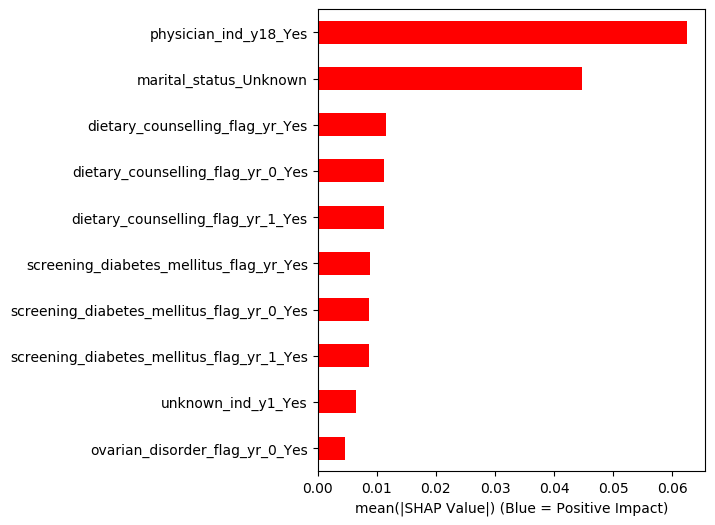

In [140]:
# f = plt.figure()
plot_df.plot.barh(x='index', y='mean(|SHAP values|)',color=colorlist, figsize=(5,6), legend=False)
plt.xlabel("mean(|SHAP Value|) (Blue = Positive Impact)")
plt.ylabel('')
plt.savefig('shap.png',bbox_inches='tight', dpi=600)
plt.show()

In [141]:
# Fits the explainer
explainer = shap.Explainer(dt.predict, test_X[:2000])
# Calculates the SHAP values - It takes some time
shap_values = explainer(test_X[:2000])

Permutation explainer: 2001it [01:57, 16.97it/s]                          


In [142]:
pred = dt.predict(test_X[:2000])

In [143]:
pred .mean()

0.927

In [144]:
shap_values.base_values

array([0.85, 0.85, 0.85, ..., 0.85, 0.85, 0.85])

In [145]:
# shap.initjs()
# shap.plots.force(shap_values.base_values[5],shap_values.values[5], feature_names=test_X.columns)

In [146]:
# shap.plots.force(shap_values.base_values[2],shap_values.values[2], feature_names=test_X.columns)

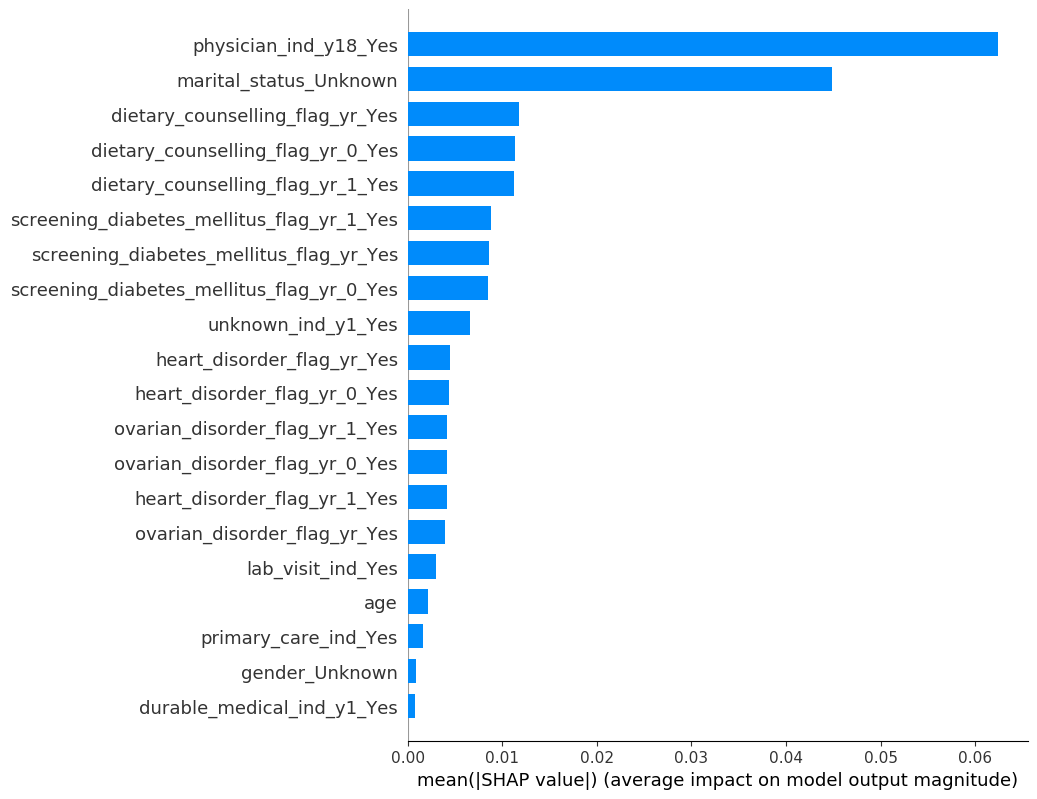

In [147]:
f = plt.figure()
shap.summary_plot(shap_values,plot_type="bar")
# f.savefig('shap.png',bbox_inches='tight', dpi=600)

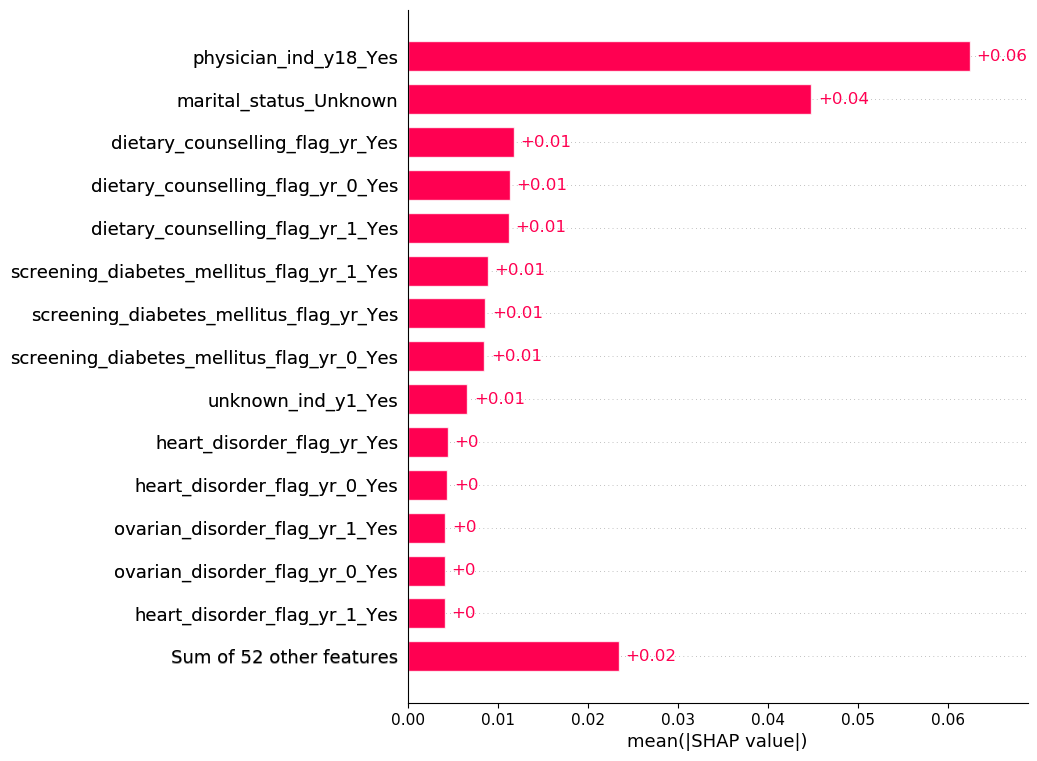

In [148]:
f = plt.figure()
shap.plots.bar(shap_values, max_display=15)
# f.savefig('shap.png',bbox_inches='tight', dpi=600)

In [149]:
# Fits the explainer
explainer1 = shap.TreeExplainer(dt, model_output="margin")
# Calculates the SHAP values - It takes some time
shap_values1 = explainer1.shap_values(test_X[:200].values)

Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.naive_bayes.GaussianNB'>

In [ ]:
shap_values1.base

In [ ]:
np.mean(np.abs(shap_values1))

In [ ]:
explainer1.expected_value

In [ ]:
shap.decision_plot(base_value=explainer1.expected_value,shap_values=shap_values1[0],feature_names=X_test.columns.tolist())

In [ ]:
shap.summary_plot(shap_values1, test_X[:100], plot_type="bar")

In [ ]:
pred.mean()

In [ ]:
shap_values.base_values

In [ ]:
shap.initjs()
shap.plots.force(shap_values.base_values[5],shap_values.values[5], feature_names=test_X.columns)

In [ ]:
f = plt.figure()
shap.summary_plot(shap_values)
# f.savefig('shap.png',bbox_inches='tight', dpi=600)

In [ ]:
f = plt.figure()
shap.plots.bar(shap_values, max_display=15)
# f.savefig('shap.png',bbox_inches='tight', dpi=600)

In [ ]:
%%time
# Fits the explainer
explainer = shap.Explainer(dt)
# Calculates the SHAP values - It takes some time
shap_values = explainer(test_X[:100])

In [ ]:
pred_prob = dt.predict(test_X[:100])

In [ ]:
pred_prob.mean()

In [ ]:
shap_values.base_values

In [ ]:
shap.initjs()
shap.plots.force(shap_values.base_values[5],shap_values.values[5], feature_names=test_X.columns)

In [ ]:
shap.plots.force(shap_values.base_values[5],shap_values.values[0], feature_names=test_X.columns)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.plots.bar(shap_values, max_display=15)
plt.savefig('shap.png')

In [ ]:
shap.decision_plot(shap_values.base_values[0], shap_values.values[0])

In [ ]:
# sex = ["ER Contributing" if shap_values[i,"er_hsa_contribution_flag_new_1"].data == 1 else "ER not Contributing" for i in range(shap_values.shape[0])]
# shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

In [ ]:
shap.plots.bar(shap_values.cohorts(3).abs.mean(0))

In [ ]:
%%time
# Fits the explainer
explainer = shap.TreeExplainer(xgb)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test[:100])

In [ ]:
pred_prob = dt.predict(test_X[:100])

In [ ]:
pred_prob.mean()

In [ ]:
shap_values.base_values

In [ ]:
shap.initjs()
shap.plots.force(shap_values.base_values[5],shap_values.values[5], feature_names=test_X.columns)

In [ ]:
shap.plots.force(shap_values.base_values[5],shap_values.values[0], feature_names=X_test.columns)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.plots.bar(shap_values, max_display=15)
plt.savefig('shap.png')

In [ ]:
shap.decision_plot(shap_values.base_values[0], shap_values.values[0])

In [ ]:
# Fits the explainer
explainer = shap.Explainer(dt.predict_proba, test_X[:2000])
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test[:2000])

In [ ]:
pred_prob = dt.predict_proba(test_X[:2000])

In [ ]:
pred_prob[:, 1].mean()

In [ ]:
shap_values.values[5,:,1]

In [ ]:
# shap.initjs()
shap.plots.force(shap_values.base_values[5,1],shap_values.values[5,:,1], feature_names=test_X.columns)

In [ ]:
shap.plots.force(shap_values.base_values[0,1],shap_values.values[0,:,1], feature_names=test_X.columns)

In [ ]:
shap.summary_plot(shap_values.values[:,:,1])

In [ ]:
shap_values.values[:,:,1][0]